# Pandas Tutorial

## Introduction to Pandas
Pandas is a powerful Python library used for data manipulation and analysis. It provides data structures and functions to efficiently handle structured data.

# Installing Pandas

In [2]:
%pip install -U pandas

## Importing Pandas
First, import the pandas library:

In [5]:
import pandas as pd
import numpy as np

## Series
A Series is a one-dimensional labeled array capable of holding any data type.

In [6]:
# Creating a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [9]:
# Displaying the Series
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## DataFrame
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. It is similar to a spreadsheet or SQL table.

# Creating a DataFrame

In [109]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Country': ['USA', 'Canada', 'Australia', 'UK']
}

In [110]:
df = pd.DataFrame(data)

### Displaying the DataFrame

In [111]:
df

,Name,Age,Country
0,Alice,25,USA
1,Bob,30,Canada
2,Charlie,35,Australia
3,David,40,UK


## Loading Data
Pandas provides various methods to load data from different sources, such as CSV, Excel, or databases.


### Loading a CSV file

In [ ]:
df = pd.read_csv('data.csv')

### Loading an Excel file

In [ ]:
df = pd.read_excel('data.xlsx')

## Data Exploration
Pandas provides numerous functions to explore and understand your data.

### Displaying the column names

In [114]:
df.columns

Index(['Name', 'Age', 'Country'], dtype='object')

### Get the number of rows and columns

In [115]:
rows, columns = df.shape
print(f'There are {rows} rows and {columns} columns')

There are 4 rows and 3 columns


### Getting summary statistics of the DataFrame

In [116]:
df.describe()

,Age
count,4.000000
mean,32.500000
std,6.454972
min,25.000000
25%,28.750000
50%,32.500000
75%,36.250000
max,40.000000


See first `n` rows of the DataFrame:

In [117]:
n = 2
df.head(n)

,Name,Age,Country
0,Alice,25,USA
1,Bob,30,Canada


In [118]:
df.tail(n)

,Name,Age,Country
2,Charlie,35,Australia
3,David,40,UK


## Data Selection and Filtering
Pandas allows you to select and filter data based on various conditions.

### Selecting a column

In [119]:
column = df['Age']

### Selecting multiple columns

In [120]:
columns = df[['Age', 'Name']] # note the double square brackets and that we do necessary have to use the same order as in the original DataFrame

Filtering data based on a condition

In [121]:
filtered_data = df[df['Age'] > 30]
filtered_data.head()

,Name,Age,Country
2,Charlie,35,Australia
3,David,40,UK


## Slicing

In [122]:
df.iloc[0] # first row

Name       Alice
Age           25
Country      USA
Name: 0, dtype: object

In [123]:
df.iloc[0, 0] # first row, first column

'Alice'

In [124]:
df.iloc[:, 0] # all rows, first column

0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

In [125]:
df.iloc[0:2, 0:2] # first two rows, first two columns

,Name,Age
0,Alice,25
1,Bob,30


In [126]:
df.iloc[:-1,-1:] # all rows except the last one, last column    

,Country
0,USA
1,Canada
2,Australia


## Data Manipulation
Pandas offers a wide range of functions for data manipulation.


In [127]:
df['Name_Country'] = df['Name'] + df['Country']
df.head()

,Name,Age,Country,Name_Country
0,Alice,25,USA,AliceUSA
1,Bob,30,Canada,BobCanada
2,Charlie,35,Australia,CharlieAustralia
3,David,40,UK,DavidUK


In [128]:
df['Young'] = df['Age'].apply(lambda x: True if x < 30 else False) # note that we can use the apply function to apply a function to a column
df['Salary'] = np.random.randint(1000, 10000, df.shape[0]) # note that we can use numpy to generate random numbers
df['Gender'] = np.nan
df.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,NaN
1,Bob,30,Canada,BobCanada,False,7492,NaN
2,Charlie,35,Australia,CharlieAustralia,False,1936,NaN
3,David,40,UK,DavidUK,False,9388,NaN


Grouping and aggregating data

In [129]:
df.groupby('Young')['Age'].sum() # note that we can use the groupby function to group data by a column and then apply a function to the grouped data

Young
False    105
True      25
Name: Age, dtype: int64

Sorting data

In [130]:
df.sort_values('Age', ascending=False)

,Name,Age,Country,Name_Country,Young,Salary,Gender
3,David,40,UK,DavidUK,False,9388,NaN
2,Charlie,35,Australia,CharlieAustralia,False,1936,NaN
1,Bob,30,Canada,BobCanada,False,7492,NaN
0,Alice,25,USA,AliceUSA,True,2693,NaN


## Data Cleaning
Pandas provides functions to clean and preprocess your data.

Handling missing values

In [131]:
df.dropna()  # Drop rows with missing values
value = 'Not Found'
df.fillna(value)  # Fill missing values with a specific value
df.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,NaN
1,Bob,30,Canada,BobCanada,False,7492,NaN
2,Charlie,35,Australia,CharlieAustralia,False,1936,NaN
3,David,40,UK,DavidUK,False,9388,NaN


Why did the previous command not change the DataFrame? Because the `fillna()` function returns a new DataFrame. To change the original DataFrame, you need to set the `inplace` parameter to `True`. A lot of Pandas methods have the `inplace` parameter so make sure to check the documentation before you use them.

In [132]:
df.fillna(value, inplace=True)  # Fill missing values with a specific value and update the DataFrame
df.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,Not Found
1,Bob,30,Canada,BobCanada,False,7492,Not Found
2,Charlie,35,Australia,CharlieAustralia,False,1936,Not Found
3,David,40,UK,DavidUK,False,9388,Not Found


### Data Visualization
Pandas integrates with other libraries like Matplotlib and Seaborn for data visualization.


Scatter plot

<Axes: xlabel='Age', ylabel='Salary'>

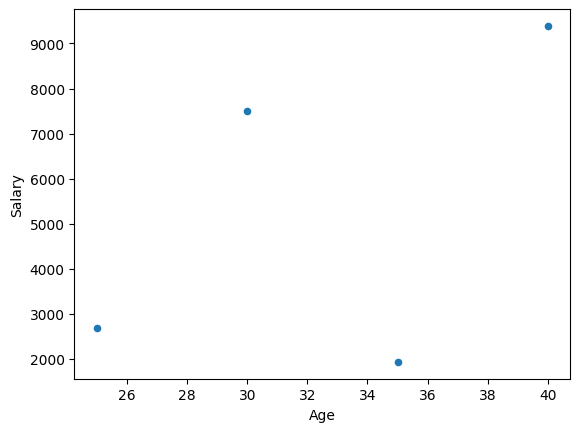

In [133]:
df.plot(kind='scatter', x='Age', y='Salary')

Bar plot

<Axes: xlabel='Age'>

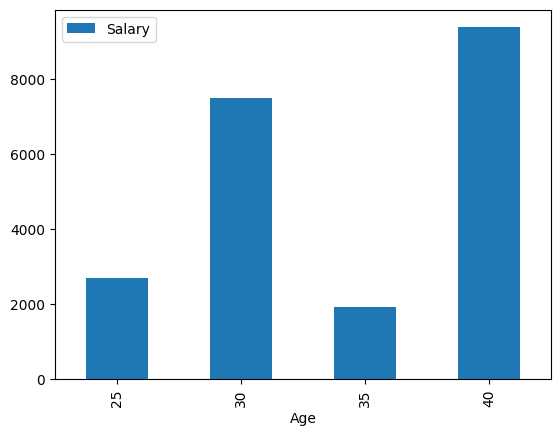

In [134]:
df.plot(kind='bar', x='Age', y='Salary')

## Subset of a DataFrame

In [135]:
df[df['Age'] == 25]['Gender'] = 'F'

C:\Users\Matte\AppData\Local\Temp\ipykernel_9956\2347535060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age'] == 25]['Gender'] = 'F'


We got a warning, specifically a `SettingWithCopyWarning`. This warning is raised when you try to assign a subset of a DataFrame to another DataFrame. To avoid this warning, you can use the `copy()` function.

In [136]:
# Setting the new value
df.loc[df['Age'] == 25, 'Gender'] = 'F'
df.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,F
1,Bob,30,Canada,BobCanada,False,7492,Not Found
2,Charlie,35,Australia,CharlieAustralia,False,1936,Not Found
3,David,40,UK,DavidUK,False,9388,Not Found


In [137]:
df[df['Age'] == 25]['Gender'] = 'F'

C:\Users\Matte\AppData\Local\Temp\ipykernel_9956\2347535060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age'] == 25]['Gender'] = 'F'


In [138]:
new_df = df[df['Age'] == 25].copy() # note that we need to use the copy function to avoid the SettingWithCopyWarning and make sure it is not referenced to the original DataFrame in memory object
new_df.loc[df['Name'] == 'Alice', 'Gender'] = 'NA'
new_df.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,NA


### Referencing

In [139]:
df2 = df
df2.head()

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,25,USA,AliceUSA,True,2693,F
1,Bob,30,Canada,BobCanada,False,7492,Not Found
2,Charlie,35,Australia,CharlieAustralia,False,1936,Not Found
3,David,40,UK,DavidUK,False,9388,Not Found


In [140]:
df2.iloc[:, 1] = 0
df2

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,0,USA,AliceUSA,True,2693,F
1,Bob,0,Canada,BobCanada,False,7492,Not Found
2,Charlie,0,Australia,CharlieAustralia,False,1936,Not Found
3,David,0,UK,DavidUK,False,9388,Not Found


In [142]:
df.head() # note that the original DataFrame has been updated as well since it is a reference to the same object in memory. This is not the case with the copy method above.

,Name,Age,Country,Name_Country,Young,Salary,Gender
0,Alice,0,USA,AliceUSA,True,2693,F
1,Bob,0,Canada,BobCanada,False,7492,Not Found
2,Charlie,0,Australia,CharlieAustralia,False,1936,Not Found
3,David,0,UK,DavidUK,False,9388,Not Found


This tutorial provides a brief introduction to pandas, covering the creation of Series and DataFrames, data loading, exploration, selection, filtering, manipulation, cleaning, and visualization. Pandas offers extensive functionality for data analysis and is an essential library for any data scientist or analyst.

Feel free to explore the pandas documentation (https://pandas.pydata.org/docs/) for detailed information on each topic.

---

# What's next?

Next notebook: [Where to find datasets?](https://github.com/vrughetti/python4DS/blob/main/notebooks/datasets/find_datasets.ipynb)